#Logistic Regression
This Matlab code has been completed as part of [Machine Learning](https://www.coursera.org/learn/machine-learning)
course in Coursera given by Prof. Andrew Ng

------------
This note demonstrates the use of logistic regression to predict whether a student gets admitted into a university.
The goal is to determine each applicant’s chance of admission based on their results on two exams. Historical data from previous applicants is available for training logistic regression model. Each training example includes applicant’s scores on two exams and the admissions decision. The task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

This notebook includes:

- <a href='#part1'>Part 1: Visualizing the data</a>
- <a href='#part2'>Part 2: Compute Cost and Gradient</a>
- <a href='#part3'>Part 3: Optimizing using fminunc</a> 
- <a href='#part4'>Part 4: Predict and Accuracies</a>  

This code requires the following functions
* <a href='https://github.com/linhvannguyen/MachineLearning_AndrewNG/blob/master/matlab/funcs/funcs_03_LogisticRegression_costFunction.m'>funcs_03_LogisticRegression_costFunction.m</a> 

In [1]:
clear all; close all; clc; warning off;
addpath('../data/') % add path to directory containing data files
addpath('./funcs/') % add path to directory containing subfunction files

### Part 1: Visualizing the data <a id='part1'></a>

Before starting to implement any learning algorithm, it is always good to visualize the data if possible. In the first part of ex2.m, the code will load the data and display it on a 2-dimensional plot by calling the function plotData. 

The code in plotData so that it displays a figure like Figure 1, where the axes are the two exam scores, and the positive and negative examples are shown with different markers.

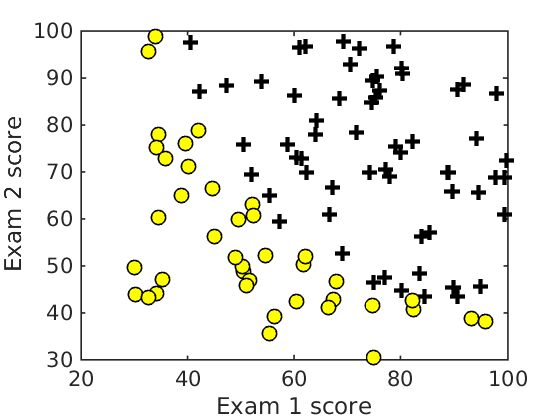

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.

In [2]:
data = load('data_03_LogisticRegression.txt');
X = data(:, [1, 2]); y = data(:, 3);

fprintf('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n');

% Find positive and negative positions based on y
pos=find(y==1); neg=find(y==0);

figure; hold on;
plot(X(pos, 1), X(pos, 2), 'k+','LineWidth', 2, 'MarkerSize', 7);
plot(X(neg, 1), X(neg, 2), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 7);
hold off;
xlabel('Exam 1 score')
ylabel('Exam 2 score')
% legend('Admitted', 'Not admitted')
box on


### Part 2: Compute Cost and Gradient <a id='part2'></a>

To estimate the cost function, recall that the logistic regression hypothesis is defined as: 
$$h_{\theta}(x)=g\left(\theta^Tx\right)$$ where function $g$ is the ** *sigmoid* ** defined as:
$$g(z)=\frac{1}{1+exp(-z)}$$
For large positive values of $z$, the sigmoid should be close to 1, while for large
negative values, the sigmoid should be close to 0. Sigmoid(0) is 0.5. The function ** *sigmoid.m* ** is implemented to compute the sigmoid function. 

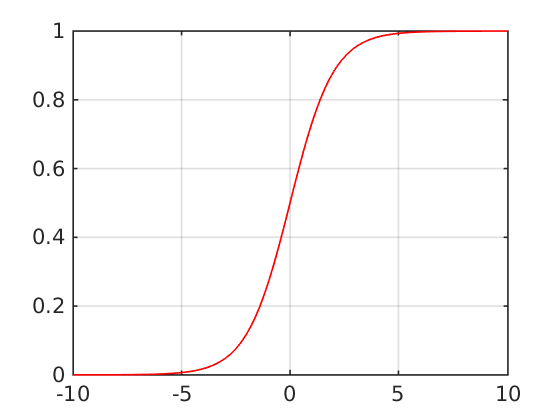

In [3]:
% Define sigmoid function
sigmoid=@(z) 1./(1+exp(-z));

plot(-10:0.2:10,sigmoid(-10:0.2:10),'r')
grid on

Now, the cost function and gradient for logistic regression is estimated using ** *costFunction.m* ** . Recall that the cost function in logistic regression is: 

$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left[ -y^{(i)}log\left( h_{\theta}\left(x^{(i)}\right) \right) - \left(1-y^{(i)} \right)log\left( 1-h_{\theta}\left(x^{(i)}\right) \right)\right]$$

and the gradient of the cost is a vector of the same length as $\theta$ where the j-th
element (for j = 0, 1, . . . , n) is defined as follows:

$$\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^{m} \left(h_{\theta}\left(x^{(i)}\right) - y^{(i)}\right)x^{(i)}_j $$

This gradient is identical to that of linear regression gradient except the different definitions of $h_{\theta}(x)$.

In [4]:
%  Setup the data matrix appropriately, and add ones for the intercept term
[m, n] = size(X);

% Add intercept term to x and X_test
X = [ones(m, 1) X];

% Initialize fitting parameters
initial_theta = zeros(n + 1, 1);

% Compute and display initial cost and gradient
J = 1/m*sum(-y.*log(sigmoid(X*initial_theta))-(1-y).*log(1-sigmoid(X*initial_theta)));
grad = 1/m*X'*(sigmoid(X*initial_theta)-y);
    
fprintf('Cost at initial theta (zeros): %f\n', J);
fprintf('Gradient at initial theta (zeros): \n');
fprintf(' %f \n', grad);

Cost at initial theta (zeros): 0.693147
Gradient at initial theta (zeros): 
 -0.100000 
 -12.009217 
 -11.262842

###Part 3: Optimizing using fminunc <a id='part3'></a>

For Linear Regression, we found the optimal parameters by implementing gradent descent. We wrote a cost function
and calculated its gradient, then took a gradient descent step accordingly. For Logistic Regression, instead of taking gradient descent steps, we use the built-in function called fminunc. This is an optimization solver that finds the minimum of an unconstrained 2 function. For logistic regression, we want to optimize the cost function $J(\theta)$ with parameters $\theta$. Concretely, you are going to use *fminunc* to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of X and y
values). *fminunc* requires the following inputs:
* The initial values of the parameters we are trying to optimize.
* A function that, when given the training set and a particular $\theta$, computes
the logistic regression cost and gradient with respect to θ for the dataset (X, y)

In the following snippet, we first defined the options to be used with *fminunc*. Specifically, we set the *GradObj* option to on, which tells fminunc that our function returns both the cost and the gradient. This allows *fminunc* to use the gradient when minimizing the function. Furthermore, we set the *MaxIter* option to 400, so that *fminunc* will run for at most 400 steps before it terminates.

To specify the actual function we are minimizing, we use a "short-hand" for specifying functions with the *@(t) ( costFunction(t, X, y) )* . This creates a function, with argument t, which calls your *costFunction*. This
allows us to wrap the costFunction for use with *fminunc*. It will converge on the right optimization parameters and return the final values of the cost and $\theta$. Notice that by using *fminunc*, you did not have to write any loops yourself, or set a learning rate like you did for gradient descent. This is all done by *fminunc*, and you only needed to provide a function calculating the cost and the gradient.

In [5]:
%  Set options for fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);

%  Run fminunc to obtain the optimal theta. This function will return theta and the cost 
[theta, cost] = fminunc(@(t)(funcs_03_LogisticRegression_costFunction(t, X, y)), initial_theta, options);

% Print theta to screen
fprintf('Cost at theta found by fminunc: %f\n', cost);
fprintf('theta: \n');
fprintf(' %f \n', theta);


Local minimum possible.

fminunc stopped because the final change in function value relative to 
its initial value is less than the default value of the function tolerance.



Cost at theta found by fminunc: 0.203506
theta: 
 -24.932923 
 0.204407 
 0.199617

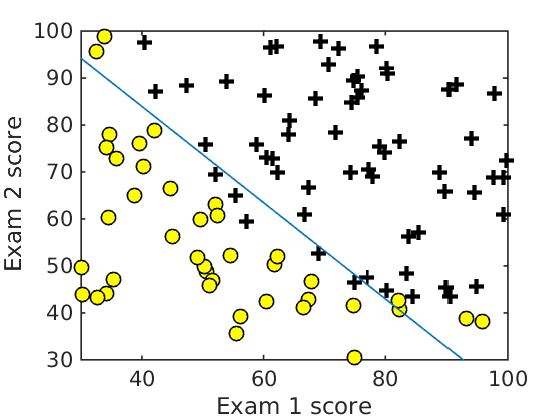

In [6]:
% Estimate 2 points of linear boundary
plot_x = [min(X(:,2))-2,  max(X(:,2))+2];
plot_y = (-1./theta(3)).*(theta(2).*plot_x + theta(1));

figure; hold on;
plot(X(pos, 2), X(pos, 3), 'k+','LineWidth', 2, 'MarkerSize', 7);
plot(X(neg, 2), X(neg, 3), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 7);
plot(plot_x, plot_y)
hold off;
xlabel('Exam 1 score')
ylabel('Exam 2 score')
% legend('Admitted', 'Not admitted')
box on
axis([30, 100, 30, 100])

% legend('Admitted', 'Not admitted', 'Decision Boundary')

### Part 4: Predict and Accuracies <a id='part4'></a>

After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776.
Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. In this part, your task is to complete the code in predict.m. The predict function
will produce “1” or “0” predictions given a dataset and a learned parameter vector $\theta$.

In [7]:
x_test=[1 45 85];
prob = sigmoid(x_test*theta);

fprintf('\n Probability for the student with score 45 and 85 to be admitted is %.2f percents',100*prob)


Probability for the student with score 45 and 85 to be admitted is 77.43 percents